# Basic Describe

In [1]:
library(dplyr)
library(corrgram)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'corrgram' was built under R version 3.6.1"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus


### Data load

In [2]:
library(data.table)

bigcon_weather <- fread("bigcon_weather.csv", encoding = "UTF-8", header= TRUE)
korea_cvs <- fread("korea_cvs.csv", encoding = "UTF-8", header= TRUE)
korea_hnb <- fread("korea_hnb.csv", encoding = "UTF-8", header= TRUE)
social_br <- fread("social_br.csv", encoding = "UTF-8", header= TRUE)
social_date <- fread("social_date.csv", encoding = "UTF-8", header= TRUE)
social_health <- fread("social_health.csv", encoding = "UTF-8", header= TRUE)
social_hobby <- fread("social_hobby.csv", encoding = "UTF-8", header= TRUE)
social_pm <- fread("social_pm.csv", encoding = "UTF-8", header= TRUE)


Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last



In [3]:
head(bigcon_weather,1)
head(korea_cvs,1)
str(korea_cvs)
head(korea_hnb,1)
str(korea_hnb)
head(social_br,1)
head(social_date,1)
head(social_health,1)
head(social_hobby,1)
head(social_pm,1)

bigcon_weather.tm,bigcon_weather.stn_id,bigcon_weather.pvn_nm,bigcon_weather.bor_nm,bigcon_weather.max_ta,bigcon_weather.max_ws,bigcon_weather.min_ta,bigcon_weather.avg_ta,bigcon_weather.avg_rhm,bigcon_weather.avg_ws,bigcon_weather.sum_rn
20160101,98,경기도,동두천시,6.5,3.8,-6.4,-0.2,74,0.9,0


korea_cvs.pvn_nm,korea_cvs.sale_dt,korea_cvs.gen_cd,korea_cvs.age_cd,korea_cvs.category,korea_cvs.adj_qty,korea_cvs.bor_nm
서울특별시,20160101,F,00~19,라면,7,종로구


Classes 'data.table' and 'data.frame':	2707786 obs. of  7 variables:
 $ korea_cvs.pvn_nm  : chr  "서울특별시" "서울특별시" "서울특별시" "서울특별시" ...
 $ korea_cvs.sale_dt : int  20160101 20160101 20160101 20160101 20160101 20160101 20160101 20160101 20160101 20160101 ...
 $ korea_cvs.gen_cd  : chr  "F" "F" "F" "F" ...
 $ korea_cvs.age_cd  : chr  "00~19" "20~39" "20~39" "20~39" ...
 $ korea_cvs.category: chr  "라면" "과자" "라면" "마스크" ...
 $ korea_cvs.adj_qty : int  7 655 282 35 183 78 56 14 28 211 ...
 $ korea_cvs.bor_nm  : chr  "종로구" "종로구" "종로구" "종로구" ...
 - attr(*, ".internal.selfref")=<externalptr> 


korea_hnb.pvn_nm,korea_hnb.bor_nm,korea_hnb.sale_dt,korea_hnb.gen_cd,korea_hnb.age_cd,korea_hnb.category,korea_hnb.qty
서울특별시,종로구,20160101,F,20~39,립컬러,73


Classes 'data.table' and 'data.frame':	820274 obs. of  7 variables:
 $ korea_hnb.pvn_nm  : chr  "서울특별시" "서울특별시" "서울특별시" "서울특별시" ...
 $ korea_hnb.bor_nm  : chr  "종로구" "종로구" "종로구" "종로구" ...
 $ korea_hnb.sale_dt : int  20160101 20160101 20160101 20160101 20160101 20160101 20160101 20160101 20160101 20160102 ...
 $ korea_hnb.gen_cd  : chr  "F" "F" "F" "F" ...
 $ korea_hnb.age_cd  : chr  "20~39" "20~39" "20~39" "20~39" ...
 $ korea_hnb.category: chr  "립컬러" "립케어" "마스크팩" "바디로션" ...
 $ korea_hnb.qty     : int  73 219 657 328 109 73 182 146 36 73 ...
 - attr(*, ".internal.selfref")=<externalptr> 


social_br.date,social_br.blog,social_br.twitter,social_br.news,social_br.total
2016-01-01,3211,596,36,3843


social_date.date,social_date.blog,social_date.twitter,social_date.news,social_date.total
2016-01-01,934,1334,159,2427


social_health.date,social_health.blog,social_health.twitter,social_health.news,social_health.total
2016-01-01,3606,5325,455,9386


social_hobby.date,social_hobby.blog,social_hobby.twitter,social_hobby.news,social_hobby.total
2016-01-01,621,1342,21,1984


social_pm.date,social_pm.blog,social_pm.twitter,social_pm.news,social_pm.total
2016-01-01,134,114,64,312


### merge를 위한 새로운 컬럼 생성

In [4]:
str(bigcon_weather)
str(korea_hnb)

Classes 'data.table' and 'data.frame':	59113 obs. of  11 variables:
 $ bigcon_weather.tm     : int  20160101 20160102 20160103 20160104 20160105 20160106 20160107 20160108 20160109 20160110 ...
 $ bigcon_weather.stn_id : int  98 98 98 98 98 98 98 98 98 98 ...
 $ bigcon_weather.pvn_nm : chr  "경기도" "경기도" "경기도" "경기도" ...
 $ bigcon_weather.bor_nm : chr  "동두천시" "동두천시" "동두천시" "동두천시" ...
 $ bigcon_weather.max_ta : num  6.5 10.1 9 8 3.1 4.4 3.3 3.3 3 5.8 ...
 $ bigcon_weather.max_ws : num  3.8 3.2 2.4 5.3 5.6 5.4 4.8 5.2 5.1 6.2 ...
 $ bigcon_weather.min_ta : num  -6.4 1.9 2.1 -3 -6.4 -7.9 -8.8 -10 -9.8 -4.6 ...
 $ bigcon_weather.avg_ta : num  -0.2 5.4 4.7 1.9 -2.8 -2.4 -3.7 -4.1 -3.6 -0.5 ...
 $ bigcon_weather.avg_rhm: int  74 70 82 55 36 55 48 50 58 42 ...
 $ bigcon_weather.avg_ws : num  0.9 1.3 0.7 2.2 1.8 1.5 1.7 1.3 1.4 1.8 ...
 $ bigcon_weather.sum_rn : num  0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 
Classes 'data.table' and 'data.frame':	820274 obs. of  7 var

In [5]:
bigcon_weather <- mutate(bigcon_weather, standard = paste(bigcon_weather.pvn_nm , bigcon_weather.bor_nm , 
                                                          as.character(bigcon_weather.tm)))

In [6]:
korea_hnb <- mutate(korea_hnb, standard = paste(korea_hnb.pvn_nm, korea_hnb.bor_nm, as.character(korea_hnb.sale_dt)))

### bigcon_weather과 korea_hnb 병합

In [7]:
total_data <- merge(bigcon_weather, korea_hnb, by = "standard")

#중복되는 컬럼 제거
total_data <- total_data[,c(2,3,4,5,6,7,8,9,10,11,12,16,17,18,19)]

head(total_data)

bigcon_weather.tm,bigcon_weather.stn_id,bigcon_weather.pvn_nm,bigcon_weather.bor_nm,bigcon_weather.max_ta,bigcon_weather.max_ws,bigcon_weather.min_ta,bigcon_weather.avg_ta,bigcon_weather.avg_rhm,bigcon_weather.avg_ws,bigcon_weather.sum_rn,korea_hnb.gen_cd,korea_hnb.age_cd,korea_hnb.category,korea_hnb.qty
20160101,540,경기도,고양시,5.2,2.5,-5,1.2,73,0.6,0,F,20~39,마스크팩,657
20160101,540,경기도,고양시,5.2,2.5,-5,1.2,73,0.6,0,F,20~39,네일,73
20160101,540,경기도,고양시,5.2,2.5,-5,1.2,73,0.6,0,M,20~39,선케어,36
20160101,540,경기도,고양시,5.2,2.5,-5,1.2,73,0.6,0,F,20~39,립케어,219
20160101,540,경기도,고양시,5.2,2.5,-5,1.2,73,0.6,0,F,20~39,립컬러,255
20160101,540,경기도,고양시,5.2,2.5,-5,1.2,73,0.6,0,F,00~19,마스크팩,36


### 카테고리별 비율

In [8]:
prop.table(table(total_data$korea_hnb.category))


        네일       립컬러       립케어     마스크팩     바디로션       선케어 
  0.07216350   0.14690316   0.10285012   0.16918730   0.09652569   0.07519574 
      제모제     체중조절     크림로션 훼이셜클렌저 
  0.03778310   0.04101459   0.12847003   0.12990676 

#### total_data 속성별 boxplot

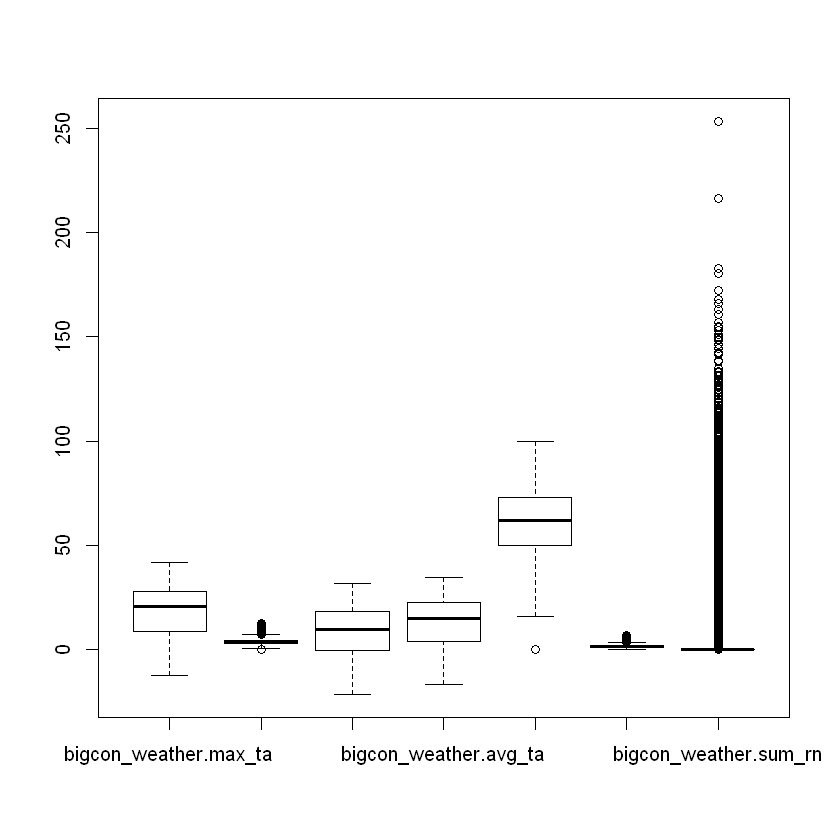

In [9]:
boxplot(total_data[,c(5,6,7,8,9,10,11)])

### korea_hnb의 상품별 판매 표준편차 확인

In [10]:
cat("네일 : ",sd((subset(total_data, korea_hnb.category == "네일"))$korea_hnb.qty))
cat("립컬러 : ",sd((subset(total_data, korea_hnb.category == "립컬러"))$korea_hnb.qty))
cat("립케어 : ",sd((subset(total_data, korea_hnb.category == "립케어"))$korea_hnb.qty))
cat("마스크팩 : ",sd((subset(total_data, korea_hnb.category == "마스크팩"))$korea_hnb.qty))
cat("바디로션 : ",sd((subset(total_data, korea_hnb.category == "바디로션"))$korea_hnb.qty))
cat("선케어 : ",sd((subset(total_data, korea_hnb.category == "선케어"))$korea_hnb.qty))
cat("제모제 : ",sd((subset(total_data, korea_hnb.category == "제모제"))$korea_hnb.qty))
cat("체중조절 : ",sd((subset(total_data, korea_hnb.category == "체중조절"))$korea_hnb.qty))
cat("크림로션 : ",sd((subset(total_data, korea_hnb.category == "크림로션"))$korea_hnb.qty))
cat("훼이셜클렌저 : ",sd((subset(total_data, korea_hnb.category == "훼이셜클렌저"))$korea_hnb.qty))

네일 :  185.1118립컬러 :  796.8029립케어 :  239.9644마스크팩 :  2766.485바디로션 :  2509.85선케어 :  247.6451제모제 :  73.62968체중조절 :  323.7414크림로션 :  835.2895훼이셜클렌저 :  237.7865

##### 립컬러 선택

In [11]:
lip_total_data <- subset(total_data , korea_hnb.category == "립컬러")

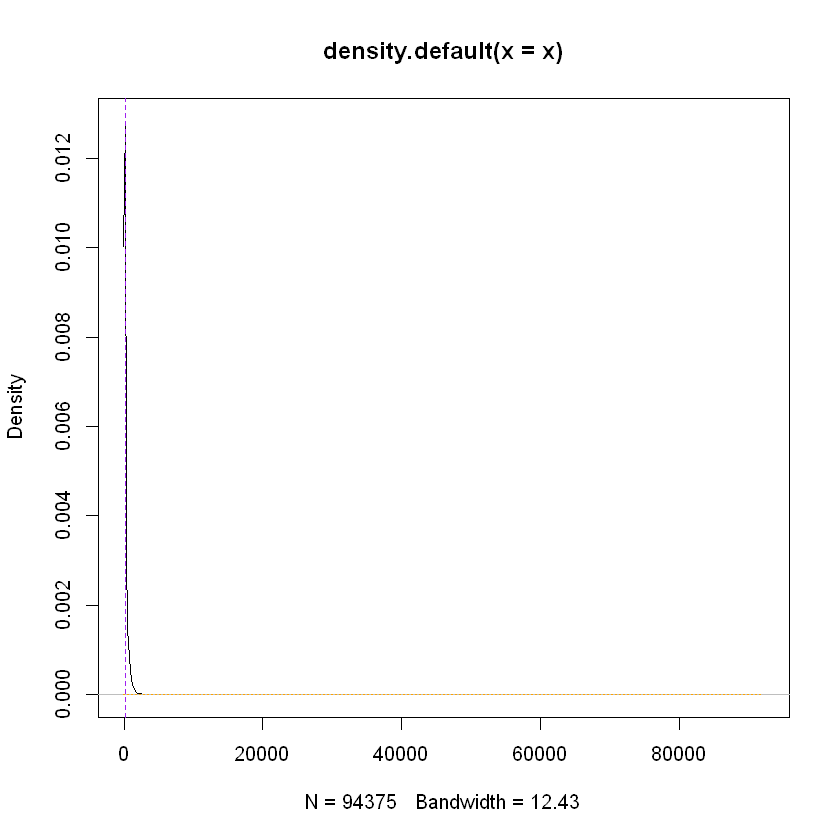

In [12]:
# 분포표 (정규분포 이루고 있지 않음.)

x <- lip_total_data$korea_hnb.qty

plot(density(x))
den.norm <- function(x)dnorm(x,mean=mean(x),sd=sd(x))
curve(den.norm, col="orange",add=TRUE,lty=3)
abline(v=mean(x),col="purple",lty=2)

### Time Series Graph

In [13]:
lip_total_data$bigcon_weather.tm <- as.Date(as.character(lip_total_data$bigcon_weather.tm), format = "%Y%m%d")

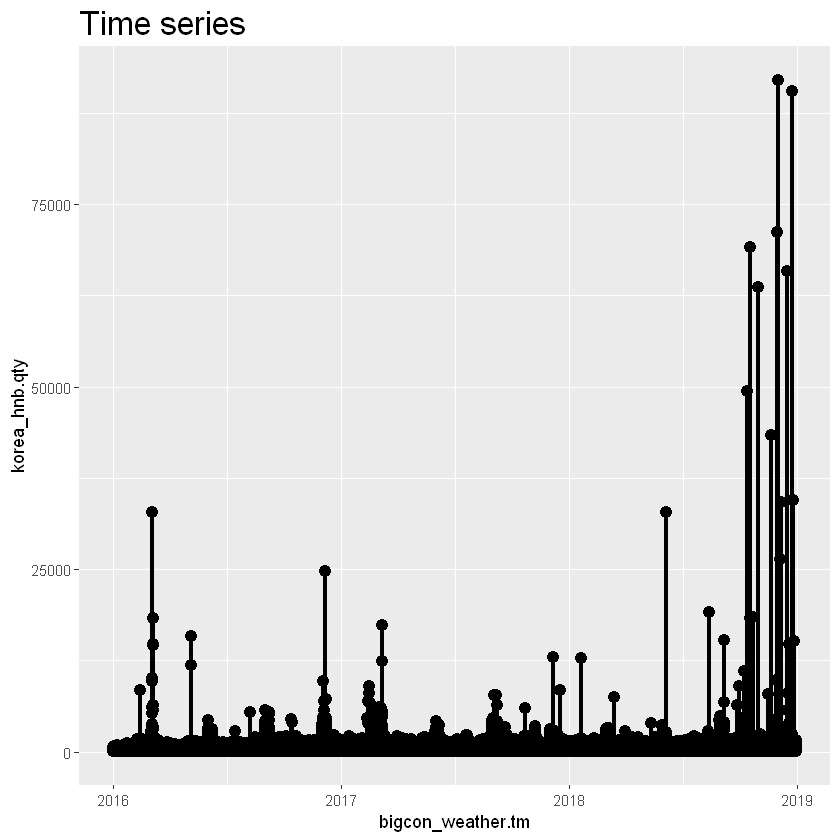

In [14]:
library(ggplot2)

ggplot(data = lip_total_data, aes(x= bigcon_weather.tm, y = korea_hnb.qty))+
geom_line(size=1.2) +
geom_point(size=3) +
ggtitle("Time series") +
theme(plot.title=element_text(size=20))

### 분석을위해 factor 형으로 변환

In [15]:
str(lip_total_data)
lip_total_data$korea_hnb.gen_cd <- as.factor(lip_total_data$korea_hnb.gen_cd)
lip_total_data$korea_hnb.age_cd <- as.factor(lip_total_data$korea_hnb.age_cd)
str(lip_total_data)

'data.frame':	94375 obs. of  15 variables:
 $ bigcon_weather.tm     : Date, format: "2016-01-01" "2016-01-01" ...
 $ bigcon_weather.stn_id : int  540 540 540 540 540 540 540 540 540 540 ...
 $ bigcon_weather.pvn_nm : chr  "경기도" "경기도" "경기도" "경기도" ...
 $ bigcon_weather.bor_nm : chr  "고양시" "고양시" "고양시" "고양시" ...
 $ bigcon_weather.max_ta : num  5.2 5.2 5.2 10.6 10.6 9.5 9.5 9.5 5.9 5.9 ...
 $ bigcon_weather.max_ws : num  2.5 2.5 2.5 3.6 3.6 1.8 1.8 1.8 4.6 4.6 ...
 $ bigcon_weather.min_ta : num  -5 -5 -5 3 3 2 2 2 -3.4 -3.4 ...
 $ bigcon_weather.avg_ta : num  1.2 1.2 1.2 6.4 6.4 5.4 5.4 5.4 1.4 1.4 ...
 $ bigcon_weather.avg_rhm: int  73 73 73 73 73 87 87 87 58 58 ...
 $ bigcon_weather.avg_ws : num  0.6 0.6 0.6 1.7 1.7 0.2 0.2 0.2 1.6 1.6 ...
 $ bigcon_weather.sum_rn : num  0 0 0 0 0 0 0 0 0 0 ...
 $ korea_hnb.gen_cd      : chr  "F" "M" "F" "F" ...
 $ korea_hnb.age_cd      : chr  "20~39" "20~39" "40~59" "00~19" ...
 $ korea_hnb.category    : chr  "립컬러" "립컬러" "립컬러" "립컬러" ...
 $ korea_hnb.qty 

 ### 상관분석

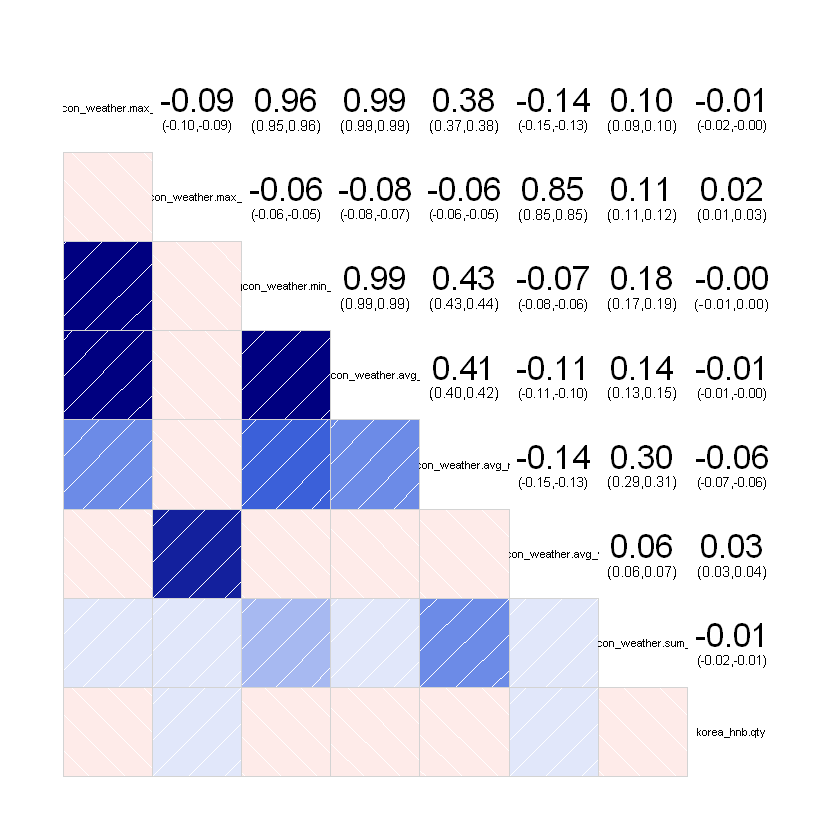

In [16]:
corrgram(lip_total_data[,c(5,6,7,8,9,10,11,12,13,15)],upper.panel=panel.conf)

# 립컬러의 판매수량은 날씨와 상관계수가 전혀 없음.

In [17]:
# 메모리 부족으로 fisher.test(불가)

#t <- xtabs(korea_hnb.qty~bigcon_weather.max_ta+bigcon_weather.max_ws, data = lip_total_data)
#fisher.test(t)


### Linear Regression

In [18]:
# 연속형 변수만 추출

lip_total_data_linear <- lip_total_data[,c(5,6,7,8,9,10,11,15)]

str(lip_total_data_linear)

'data.frame':	94375 obs. of  8 variables:
 $ bigcon_weather.max_ta : num  5.2 5.2 5.2 10.6 10.6 9.5 9.5 9.5 5.9 5.9 ...
 $ bigcon_weather.max_ws : num  2.5 2.5 2.5 3.6 3.6 1.8 1.8 1.8 4.6 4.6 ...
 $ bigcon_weather.min_ta : num  -5 -5 -5 3 3 2 2 2 -3.4 -3.4 ...
 $ bigcon_weather.avg_ta : num  1.2 1.2 1.2 6.4 6.4 5.4 5.4 5.4 1.4 1.4 ...
 $ bigcon_weather.avg_rhm: int  73 73 73 73 73 87 87 87 58 58 ...
 $ bigcon_weather.avg_ws : num  0.6 0.6 0.6 1.7 1.7 0.2 0.2 0.2 1.6 1.6 ...
 $ bigcon_weather.sum_rn : num  0 0 0 0 0 0 0 0 0 0 ...
 $ korea_hnb.qty         : int  255 73 255 36 109 73 109 182 36 109 ...


In [19]:
m <- lm(korea_hnb.qty~.,data = lip_total_data_linear)
summary(m)

# max_ta, avg_ta 는 통계적으로 유의하지 않음. -> 제거

lip_total_data_linear2 <- lip_total_data_linear[,c(2,3,5,6,7,8)]

str(lip_total_data_linear2)


Call:
lm(formula = korea_hnb.qty ~ ., data = lip_total_data_linear)

Residuals:
    Min      1Q  Median      3Q     Max 
 -312.8  -141.1   -93.0    13.2 18179.5 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            250.79682    8.25537  30.380  < 2e-16 ***
bigcon_weather.max_ta   -2.12156    1.23201  -1.722   0.0851 .  
bigcon_weather.max_ws   -8.01833    1.92553  -4.164 3.13e-05 ***
bigcon_weather.min_ta    4.92432    1.19524   4.120 3.80e-05 ***
bigcon_weather.avg_ta   -1.72752    2.27934  -0.758   0.4485    
bigcon_weather.avg_rhm  -1.13950    0.07897 -14.430  < 2e-16 ***
bigcon_weather.avg_ws   37.32775    3.53017  10.574  < 2e-16 ***
bigcon_weather.sum_rn   -0.56062    0.13021  -4.305 1.67e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 335 on 60271 degrees of freedom
  (34096 observations deleted due to missingness)
Multiple R-squared:  0.01083,	Adjusted R-squared:  0.01072 
F-

'data.frame':	94375 obs. of  6 variables:
 $ bigcon_weather.max_ws : num  2.5 2.5 2.5 3.6 3.6 1.8 1.8 1.8 4.6 4.6 ...
 $ bigcon_weather.min_ta : num  -5 -5 -5 3 3 2 2 2 -3.4 -3.4 ...
 $ bigcon_weather.avg_rhm: int  73 73 73 73 73 87 87 87 58 58 ...
 $ bigcon_weather.avg_ws : num  0.6 0.6 0.6 1.7 1.7 0.2 0.2 0.2 1.6 1.6 ...
 $ bigcon_weather.sum_rn : num  0 0 0 0 0 0 0 0 0 0 ...
 $ korea_hnb.qty         : int  255 73 255 36 109 73 109 182 36 109 ...


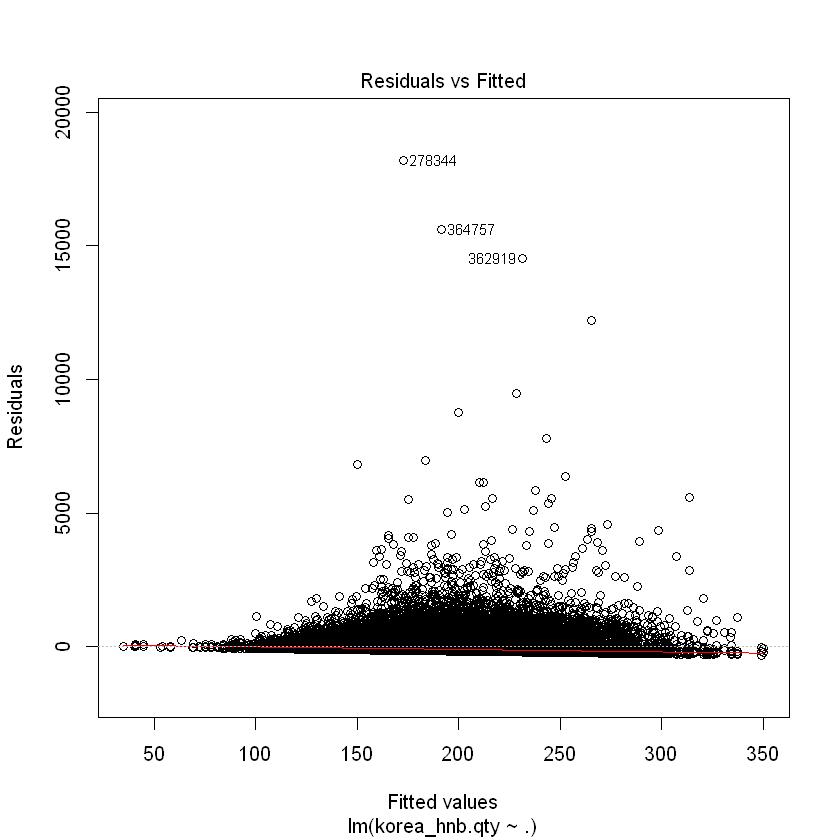

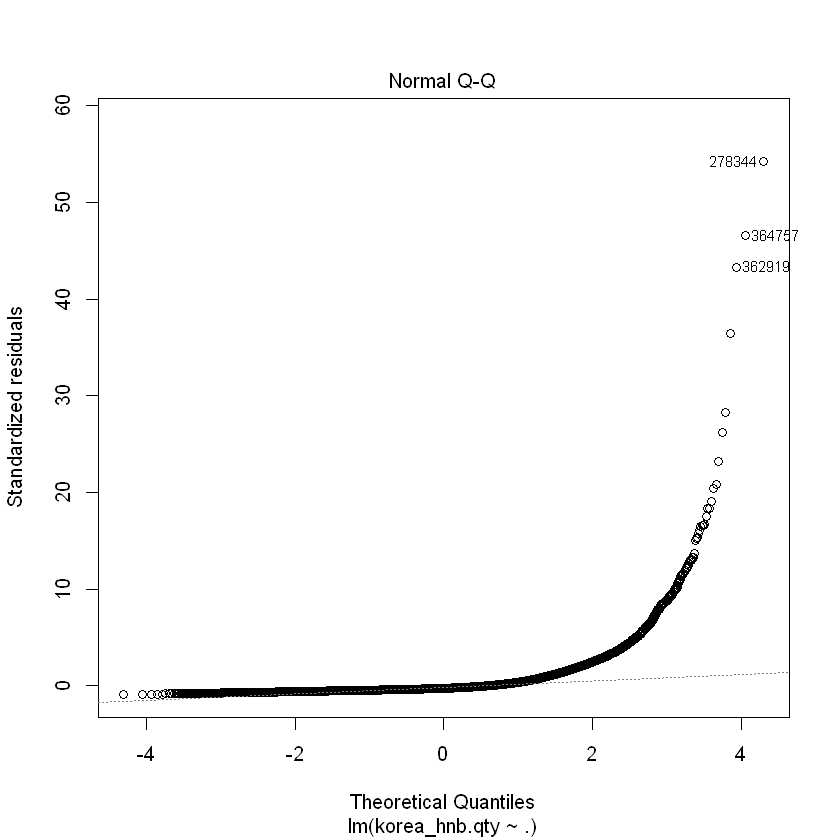

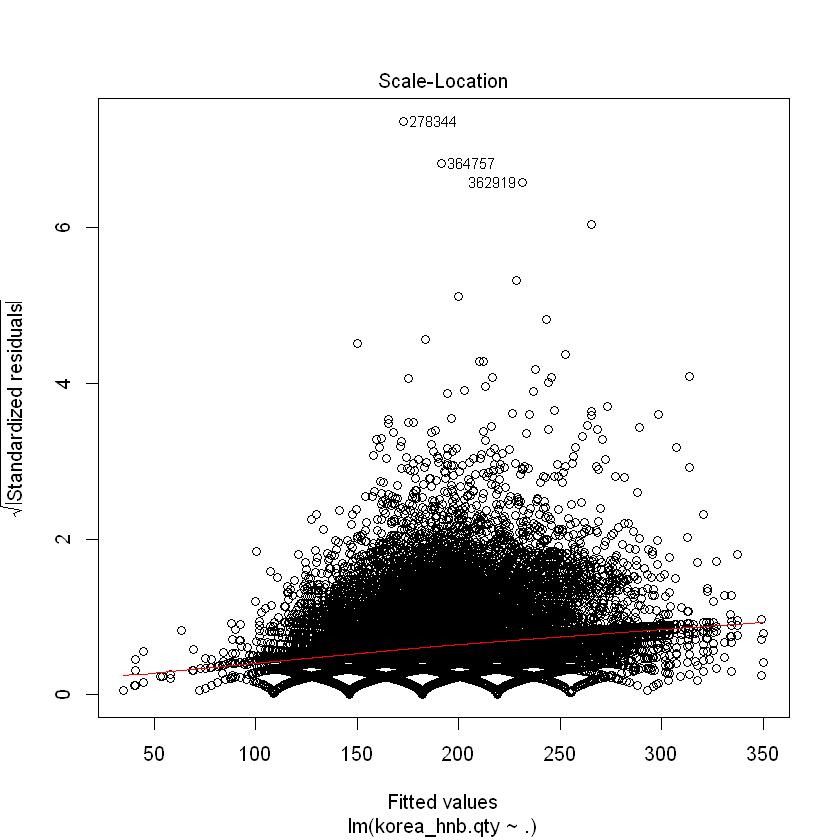

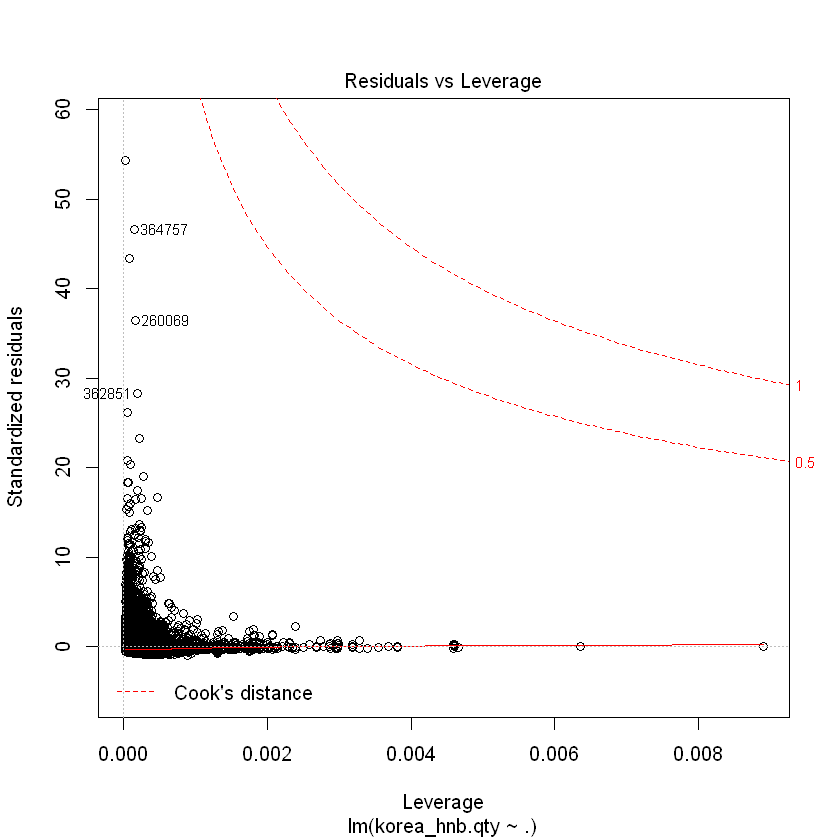

In [20]:
# 잔차 

plot(m)

### LASSO (최적 변수선택)

In [21]:
str(lip_total_data_linear2)

colSums(is.na(lip_total_data_linear2))

'data.frame':	94375 obs. of  6 variables:
 $ bigcon_weather.max_ws : num  2.5 2.5 2.5 3.6 3.6 1.8 1.8 1.8 4.6 4.6 ...
 $ bigcon_weather.min_ta : num  -5 -5 -5 3 3 2 2 2 -3.4 -3.4 ...
 $ bigcon_weather.avg_rhm: int  73 73 73 73 73 87 87 87 58 58 ...
 $ bigcon_weather.avg_ws : num  0.6 0.6 0.6 1.7 1.7 0.2 0.2 0.2 1.6 1.6 ...
 $ bigcon_weather.sum_rn : num  0 0 0 0 0 0 0 0 0 0 ...
 $ korea_hnb.qty         : int  255 73 255 36 109 73 109 182 36 109 ...


bigcon_weather.max_ws  bigcon_weather.min_ta bigcon_weather.avg_rhm 
                   597                    517                  33879 
 bigcon_weather.avg_ws  bigcon_weather.sum_rn          korea_hnb.qty 
                   535                    134                      0

In [22]:
# 독립변수들을 matrix 형태로 준비해야한다.

xmat <- as.matrix(lip_total_data_linear2[1:5])

In [23]:
yvec <- lip_total_data_linear2$korea_hnb.qty # 독립변수를 vector 형태로 

library(glmnet)
fit.lasso <- glmnet(x=xmat, y=yvec, alpha = 1, nlambda = 200) #알파 1은 Lasso 수행옵션, 100개람다 생성
fit.lasso.cv <- cv.glmnet(x=xmat, y=yvec, nfolds =10, alpha = 1, lambda = fit.lasso$lambda)
plot(fit.lasso.cv)

Warning message:
"package 'glmnet' was built under R version 3.6.1"Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-18



ERROR: Error in elnet(x, is.sparse, ix, jx, y, weights, offset, type.gaussian, : 외부 함수 호출시 NA/NaN/Inf가 있습니다 (인자 5)


### lasso 는 na 값 채우고 다시시행해야 함.